In [1]:
import os
import datetime

import pandas as pd
import numpy as np
import fi_utils
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# directories
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "data")

## Extrapolating Interest Rates

In [3]:
# Yield data from :https://www.federalreserve.gov/data/nominal-yield-curve.htm
yield_file = os.path.join(DATA_DIR, "feds200628.csv")
fed_df = pd.read_csv(yield_file, skiprows=9)
fed_df["Date"] = pd.to_datetime(fed_df["Date"])
fed_df.head()

,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


In [4]:
# filtering for required columns
req_cols = ["Date", "BETA0", "BETA1", "BETA2", "BETA3", "TAU1", "TAU2"]

fed_df = fed_df[req_cols]
fed_df.head()

,Date,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,0.339218,-999.99
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,0.325775,-999.99
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,0.348817,-999.99
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,0.282087,-999.99
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,0.310316,-999.99


In [5]:
# extrapolating 2 year, (1year, 51 week), 10 year, (9year, 51 week), 1 week interest rates using NSS model
fed_df["r2"] = fed_df.apply(lambda x: fi_utils.interest_rate_NSS(*x[1:7], 2), axis=1)
fed_df["r1"] = fed_df.apply(lambda x: fi_utils.interest_rate_NSS(*x[1:7], 2 - 7/365), axis=1)
fed_df["r10"] = fed_df.apply(lambda x: fi_utils.interest_rate_NSS(*x[1:7], 10), axis=1)
fed_df["r9"] = fed_df.apply(lambda x: fi_utils.interest_rate_NSS(*x[1:7], 10 - 7/365), axis=1)
fed_df["r1w"] = fed_df.apply(lambda x: fi_utils.interest_rate_NSS(*x[1:7], 7/365), axis=1)
fed_df.head()

,Date,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2,r2,r1,r10,r9,r1w
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,0.339218,-999.99,3.377087,3.372202,3.808129,3.807918,2.622033
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,0.325775,-999.99,3.413652,3.408506,3.864313,3.864094,2.693771
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,0.348817,-999.99,3.414231,3.409104,3.868733,3.868511,2.543441
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,0.282087,-999.99,3.438636,3.433360,3.890584,3.890365,3.197538
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,0.310316,-999.99,3.410126,3.404856,3.869568,3.869345,3.028249


In [6]:
# filtering for interest rate columns
ir_df = fed_df[["Date", "r1w", "r2", "r1", "r10", "r9"]]
ir_df = ir_df.set_index("Date")
ir_df.tail(20)

,r1w,r2,r1,r10,r9
Date,,,,,
2023-12-18,5.671892,4.384592,4.391307,3.977723,3.977136
2023-12-19,5.670850,4.368394,4.375056,3.969415,3.968854
2023-12-20,5.726222,4.287514,4.294365,3.899536,3.898991
2023-12-21,5.697957,4.278413,4.285049,3.929003,3.928429
2023-12-22,5.787510,4.249519,4.256128,3.940213,3.939631
2023-12-25,NaN,NaN,NaN,NaN,NaN
2023-12-26,5.682289,4.271676,4.278153,3.929878,3.929326
2023-12-27,5.762079,4.209302,4.216033,3.804430,3.803926
2023-12-28,5.784630,4.243779,4.250410,3.850187,3.849726


## Implementing Flattener Strategy

In [7]:
# inital parameters
START_DATE = "1983-12-30"
END_DATE = "2023-12-31"
INITIAL_CAPITAL = 1000000
MARGIN_REQUIREMENT = 0.1

# weekly rebalancing
t_delta = 7/365

In [8]:
# preparing dataframe with weekly dates
weekly_dates = pd.date_range(start=START_DATE, end=END_DATE, freq="7D")
strat_df = ir_df[START_DATE:END_DATE]
strat_df = strat_df.resample(rule="7D", label="left").first()
strat_df /= 100
strat_df.head()

,r1w,r2,r1,r10,r9
Date,,,,,
1983-12-30,0.090546,0.105502,0.105410,0.116444,0.116440
1984-01-06,0.089637,0.104820,0.104727,0.116118,0.116113
1984-01-13,0.088719,0.103243,0.103153,0.114332,0.114327
1984-01-20,0.089706,0.103269,0.103175,0.114478,0.114475
1984-01-27,0.090272,0.103017,0.102925,0.114479,0.114476


In [9]:
def cash_position(long_value, short_value, capital):
    total_cash = short_value + capital - long_value
    return total_cash

def get_qty(long_price, short_price, hedge_ratio, capital, margin):
    leverage = 1/margin
    
    position_cost = long_price + hedge_ratio * short_price
    units = capital * leverage / position_cost
    return units

def bond_price(t, ytm, c, fv, n_coupons):
    annuity = fv * ((c/n_coupons)/(ytm/n_coupons)) * (1 - 1/(1 + ytm/n_coupons)**(n_coupons*t))
    
    price = annuity + fv/(1 + ytm/n_coupons)**(n_coupons*t)
    return price

def bond_price_ZCB(t, ytm, fv):
    price = fv/(1 + ytm)**t
    return price

def convexity_ZCB(t, ytm):
    c = t * (t+1)/(1 + ytm)**2
    return c

def duration_ZCB(t, ytm, p):
    return t

In [10]:
# duration
strat_df["d2"] = 2/(1 + strat_df["r2"])
strat_df["d10"] = 10/(1 + strat_df["r10"])

# convexity
strat_df["c2"] = strat_df.apply(lambda x: convexity_ZCB(2, x["r2"]), axis=1)
strat_df["c10"] = strat_df.apply(lambda x: convexity_ZCB(10, x["r10"]), axis=1)

# price
strat_df["p2"] = strat_df.apply(lambda x: bond_price_ZCB(2, x["r2"], 100), axis=1)
strat_df["p10"] = strat_df.apply(lambda x: bond_price_ZCB(10, x["r10"], 100), axis=1)

# DV01
strat_df["DV01_2"] = strat_df["d2"] * strat_df["p2"] * 0.0001
strat_df["DV01_10"] = strat_df["d10"] * strat_df["p10"] * 0.0001

# Hedge Ration
strat_df["hedge_ratio"] = strat_df["DV01_10"]/ strat_df["DV01_2"]
strat_df

,r1w,r2,r1,r10,r9,d2,d10,c2,c10,p2,p10,DV01_2,DV01_10,hedge_ratio
Date,,,,,,,,,,,,,,
1983-12-30,0.090546,0.105502,0.105410,0.116444,0.116440,1.809133,8.957010,4.909444,88.250831,81.824060,33.237672,0.014803,0.029771,2.011139
1984-01-06,0.089637,0.104820,0.104727,0.116118,0.116113,1.810250,8.959628,4.915506,88.302436,81.925107,33.334965,0.014830,0.029867,2.013884
1984-01-13,0.088719,0.103243,0.103153,0.114332,0.114327,1.812838,8.973988,4.929571,88.585701,82.159518,33.873081,0.014894,0.030398,2.040908
1984-01-20,0.089706,0.103269,0.103175,0.114478,0.114475,1.812795,8.972813,4.929337,88.562517,82.155613,33.828780,0.014893,0.030354,2.038117
1984-01-27,0.090272,0.103017,0.102925,0.114479,0.114476,1.813208,8.972800,4.931586,88.562248,82.193108,33.828265,0.014903,0.030353,2.036688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,0.058214,0.045101,0.045165,0.042886,0.042878,1.913691,9.588771,5.493321,101.138990,91.555351,65.709722,0.017521,0.063008,3.596143
2023-12-08,0.056339,0.046496,0.046554,0.042619,0.042613,1.911140,9.591231,5.478682,101.190888,91.311368,65.878485,0.017451,0.063186,3.620768
2023-12-15,0.056610,0.043754,0.043823,0.039365,0.039359,1.916160,9.621260,5.507505,101.825502,91.791752,67.970329,0.017589,0.065396,3.718055


In [11]:
# every week close the position and calculate pnl
# i. pnl from the spread (due to change in yield over the week)
# ii. pnl from the interest accruced on cash
t2_end = 2 - t_delta
t10_end = 10 - t_delta

# price of 2 and 10 year bonds at the end of the week
strat_df["p2_end"] = (strat_df.shift(-1)).apply(lambda x: bond_price_ZCB(t2_end, x["r1"], 100), axis=1)
strat_df["p10_end"] = (strat_df.shift(-1)).apply(lambda x: bond_price_ZCB(t10_end , x["r9"], 100), axis=1)

strat_df = strat_df.reset_index()
strat_df.head()

,Date,r1w,r2,r1,r10,r9,d2,d10,c2,c10,p2,p10,DV01_2,DV01_10,hedge_ratio,p2_end,p10_end
0,1983-12-30,0.090546,0.105502,0.105410,0.116444,0.116440,1.809133,8.957010,4.909444,88.250831,81.824060,33.237672,0.014803,0.029771,2.011139,82.095579,33.406773
1,1984-01-06,0.089637,0.104820,0.104727,0.116118,0.116113,1.810250,8.959628,4.915506,88.302436,81.925107,33.334965,0.014830,0.029867,2.013884,82.327728,33.945025
2,1984-01-13,0.088719,0.103243,0.103153,0.114332,0.114327,1.812838,8.973988,4.929571,88.585701,82.159518,33.873081,0.014894,0.030398,2.040908,82.324444,33.900115
3,1984-01-20,0.089706,0.103269,0.103175,0.114478,0.114475,1.812795,8.972813,4.929337,88.562517,82.155613,33.828780,0.014893,0.030354,2.038117,82.361442,33.899780
4,1984-01-27,0.090272,0.103017,0.102925,0.114479,0.114476,1.813208,8.972800,4.931586,88.562248,82.193108,33.828265,0.014903,0.030353,2.036688,82.426828,33.960753


In [12]:
# starting with 1M capital, 10% Margin requirement
df = strat_df.copy()
df["cash"] = INITIAL_CAPITAL

# filling in values for first row
p2 = df.loc[0, "p2"]
p10 = df.loc[0, "p10"]
hedge_ratio =  df.loc[0, "hedge_ratio"]
initial_cash = df.loc[0, "cash"]

# quantity 
qty = get_qty(long_price=p10, short_price=p2, hedge_ratio=hedge_ratio, capital=initial_cash, margin=MARGIN_REQUIREMENT)
df.loc[0, "qty"] = qty

# net cash
net_cash_position = qty * (hedge_ratio * p2 - p10) + initial_cash
df.loc[0, "net_cash_position"] = net_cash_position

# pnl from spread
position_profit = (df.loc[0, "p10_end"] - df.loc[0, "p10"]) * qty - (df.loc[0, "p2_end"] - df.loc[0, "p2"]) * qty * hedge_ratio
df.loc[0, "position_profit"] = position_profit

# pnl from interest accrued
interest = (7/365) * net_cash_position * df.loc[0, "r1w"]
df.loc[0, "interest_accrued"] = interest

# total pnl
net_profit = interest + position_profit
df.loc[0, "net_profit"] = net_profit

# final cash that will be used next week
final_cash = initial_cash + position_profit + interest
df.loc[1, "cash"] = final_cash
df.head()

,Date,r1w,r2,r1,r10,r9,d2,d10,c2,c10,...,DV01_10,hedge_ratio,p2_end,p10_end,cash,qty,net_cash_position,position_profit,interest_accrued,net_profit
0,1983-12-30,0.090546,0.105502,0.105410,0.116444,0.116440,1.809133,8.957010,4.909444,88.250831,...,0.029771,2.011139,82.095579,33.406773,1000000.000000,50556.822365,7.639218e+06,-19057.966746,13265.481285,-5792.485462
1,1984-01-06,0.089637,0.104820,0.104727,0.116118,0.116113,1.810250,8.959628,4.915506,88.302436,...,0.029867,2.013884,82.327728,33.945025,994207.514538,NaN,NaN,NaN,NaN,NaN
2,1984-01-13,0.088719,0.103243,0.103153,0.114332,0.114327,1.812838,8.973988,4.929571,88.585701,...,0.030398,2.040908,82.324444,33.900115,1000000.000000,NaN,NaN,NaN,NaN,NaN
3,1984-01-20,0.089706,0.103269,0.103175,0.114478,0.114475,1.812795,8.972813,4.929337,88.562517,...,0.030354,2.038117,82.361442,33.899780,1000000.000000,NaN,NaN,NaN,NaN,NaN
4,1984-01-27,0.090272,0.103017,0.102925,0.114479,0.114476,1.813208,8.972800,4.931586,88.562248,...,0.030353,2.036688,82.426828,33.960753,1000000.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
# iteratively repeating the above process to calculate pnl every week and update cash next week
for i, row in df[1:-1].iterrows():
    p2 = df.loc[i, "p2"]
    p10 = df.loc[i, "p10"]
    hedge_ratio =  df.loc[i, "hedge_ratio"]
    initial_cash = df.loc[i, "cash"]
    
    # quantity
    qty = get_qty(long_price=p10, short_price=p2, hedge_ratio=hedge_ratio, capital=initial_cash, margin=MARGIN_REQUIREMENT)
    df.loc[i, "qty"] = qty
    
    # net cash
    net_cash_position = qty * (hedge_ratio * p2 - p10) + initial_cash
    df.loc[i, "net_cash_position"] = net_cash_position

    # pnl from spread
    position_profit = (df.loc[i, "p10_end"] - df.loc[i, "p10"]) * qty - (df.loc[i, "p2_end"] - df.loc[i, "p2"]) * qty * hedge_ratio
    df.loc[i, "position_profit"] = position_profit

    # pnl from interest
    interest = (7/365) * net_cash_position * df.loc[i, "r1w"]
    df.loc[i, "interest_accrued"] = interest
    
    # net pnl
    net_profit = interest + position_profit
    df.loc[i, "net_profit"] = net_profit

    # cash available for next week
    final_cash = initial_cash + position_profit + interest
    df.loc[i+1, "cash"] = final_cash

In [14]:
# calculating weekly and cumulative returns
df["weekly_return"] = (df["net_profit"]/df["cash"])
df["cum_return"] = (df["weekly_return"] + 1).cumprod() - 1
df

,Date,r1w,r2,r1,r10,r9,d2,d10,c2,c10,...,p2_end,p10_end,cash,qty,net_cash_position,position_profit,interest_accrued,net_profit,weekly_return,cum_return
0,1983-12-30,0.090546,0.105502,0.105410,0.116444,0.116440,1.809133,8.957010,4.909444,88.250831,...,82.095579,33.406773,1.000000e+06,50556.822365,7.639218e+06,-19057.966746,13265.481285,-5792.485462,-0.005792,-0.005792
1,1984-01-06,0.089637,0.104820,0.104727,0.116118,0.116113,1.810250,8.959628,4.915506,88.302436,...,82.327728,33.945025,9.942075e+05,50130.812943,7.594065e+06,-10064.920059,13054.715043,2989.794984,0.003007,-0.002803
2,1984-01-13,0.088719,0.103243,0.103153,0.114332,0.114327,1.812838,8.973988,4.929571,88.585701,...,82.324444,33.900115,9.971973e+05,49475.670391,7.617384e+06,-15315.895073,12960.688745,-2355.206327,-0.002362,-0.005158
3,1984-01-20,0.089706,0.103269,0.103175,0.114478,0.114475,1.812795,8.972813,4.929337,88.562517,...,82.361442,33.899780,9.948421e+05,49427.859915,7.599095e+06,-17225.705881,13073.366431,-4152.339451,-0.004174,-0.009310
4,1984-01-27,0.090272,0.103017,0.102925,0.114479,0.114476,1.813208,8.972800,4.931586,88.562248,...,82.426828,33.960753,9.906898e+05,49231.708647,7.566741e+06,-16912.423351,13099.868277,-3812.555075,-0.003848,-0.013123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,2023-12-01,0.058214,0.045101,0.045165,0.042886,0.042878,1.913691,9.588771,5.493321,101.138990,...,91.380980,65.935210,1.494511e+06,37839.949520,1.146672e+07,32260.421715,12801.836492,45062.258207,0.030152,0.539573
2084,2023-12-08,0.056339,0.046496,0.046554,0.042619,0.042613,1.911140,9.591231,5.478682,101.190888,...,91.855189,68.024482,1.539573e+06,38829.503382,1.181925e+07,6870.832894,12770.460334,19641.293228,0.012758,0.559215
2085,2023-12-15,0.056610,0.043754,0.043823,0.039365,0.039359,1.916160,9.621260,5.507505,101.825502,...,92.075476,68.000190,1.559215e+06,38098.655980,1.197220e+07,-39052.660284,12997.991035,-26054.669250,-0.016710,0.533160
2086,2023-12-22,0.057875,0.042495,0.042561,0.039402,0.039396,1.918474,9.620915,5.520814,101.818215,...,92.139330,68.207923,1.533160e+06,37514.278587,1.176687e+07,-7645.464791,13060.440196,5414.975406,0.003532,0.538575


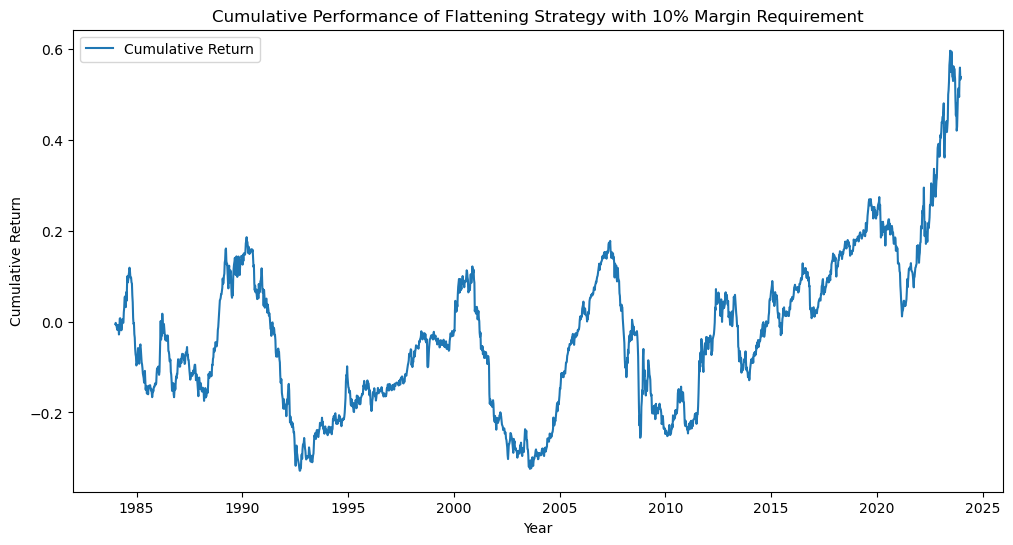

In [16]:
plt.figure(figsize=(12, 6))

plt.plot(df["Date"], df["cum_return"], label="Cumulative Return")

plt.legend(loc="best")
plt.title("Cumulative Performance of Flattening Strategy with 10% Margin Requirement")
plt.xlabel("Year")
plt.ylabel("Cumulative Return")

plt.show()